<a href="https://colab.research.google.com/github/Gaoshu-root/Code-related-courses/blob/main/mathematics-modeling_%20Notes/%E3%80%8A%E6%95%B0%E5%AD%A6%E5%BB%BA%E6%A8%A1%E3%80%8B_%E5%8D%8E%E4%B8%AD%E5%86%9C%E4%B8%9A%E5%A4%A7%E5%AD%A6%20%E7%AC%AC%2016%20%E6%AC%A1%E5%BC%80%E8%AF%BE/%E7%AC%AC%20%E5%9B%9B%20%E8%AE%B2%20%E4%BC%98%E5%8C%96%E5%BB%BA%E6%A8%A1/4.7%20%E7%94%9F%E4%BA%A7%E8%AE%A1%E5%88%92%E9%97%AE%E9%A2%98%20%E3%80%94%20pulp%20%E6%B1%82%E8%A7%A3%20%E8%BF%90%E8%BE%93%E9%97%AE%E9%A2%98%E3%80%95%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

整理自链接： [《数学建模》_华中农业大学 第 16 次开课](https://www.icourse163.org/learn/HZAU-1001658002?tid=1472021457#/learn/content)

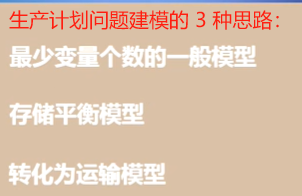

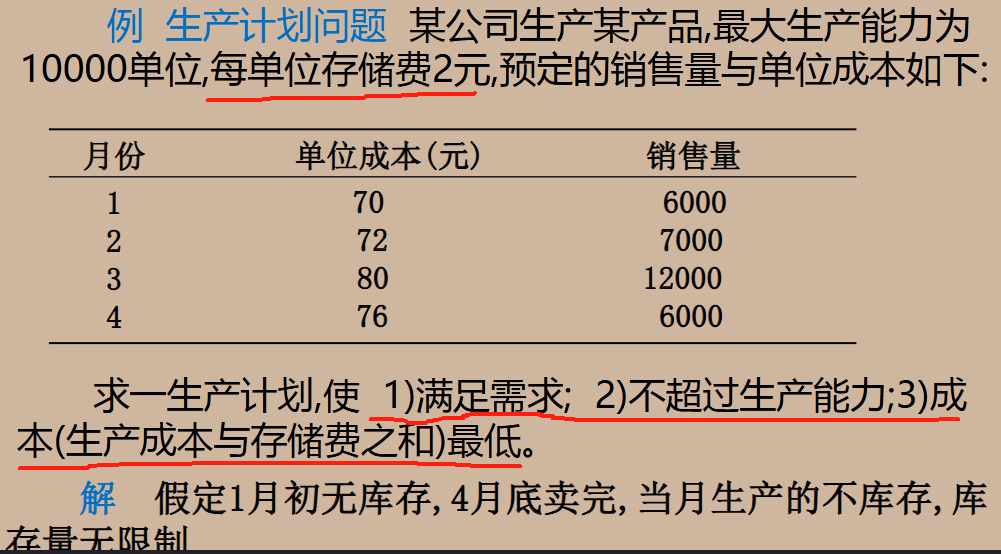

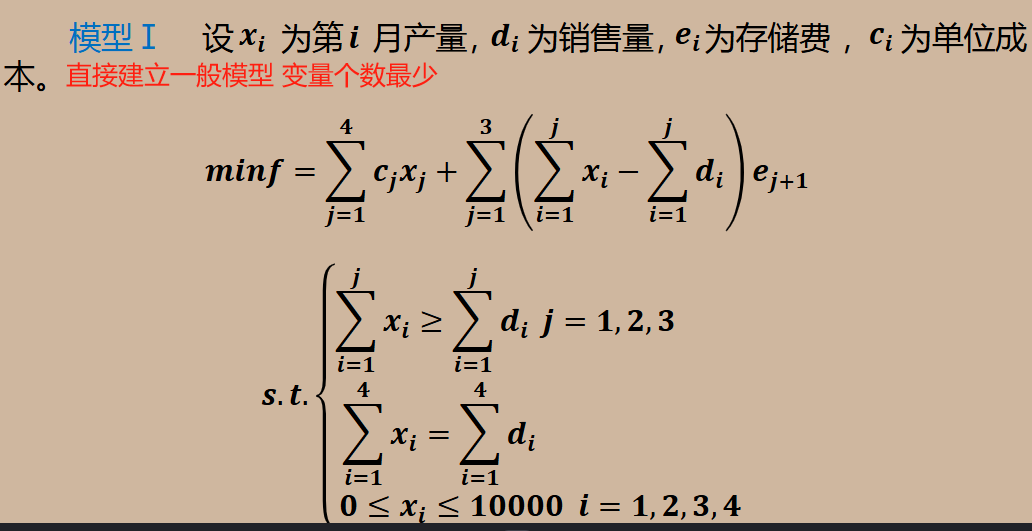

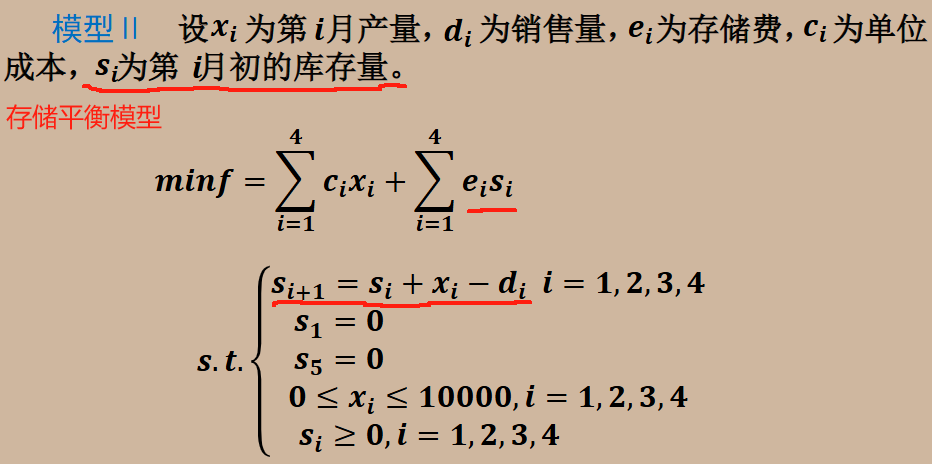

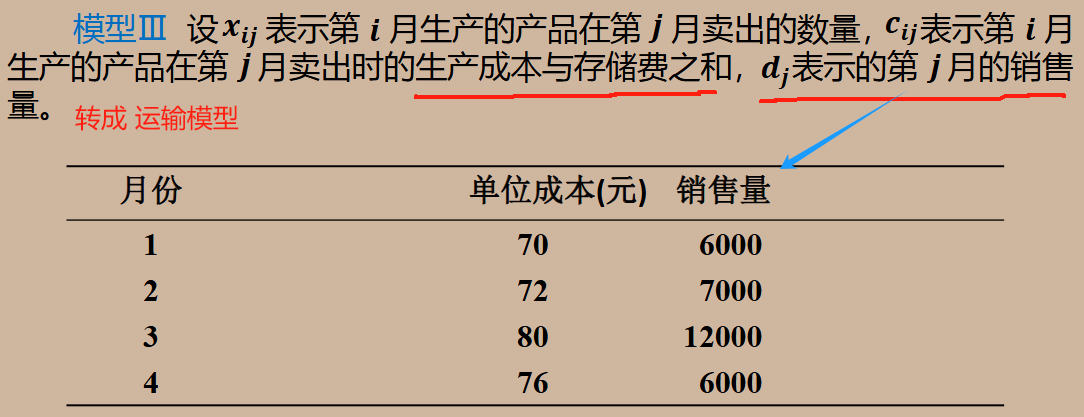

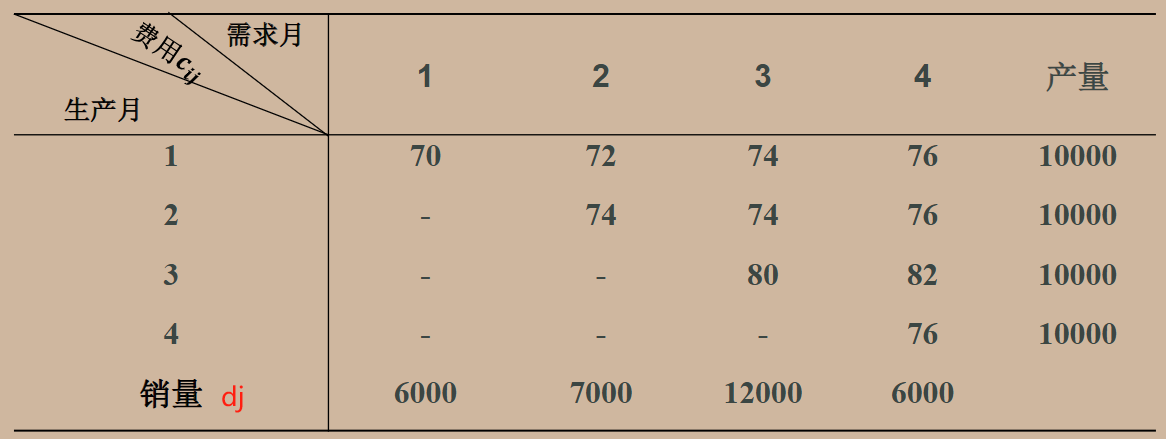

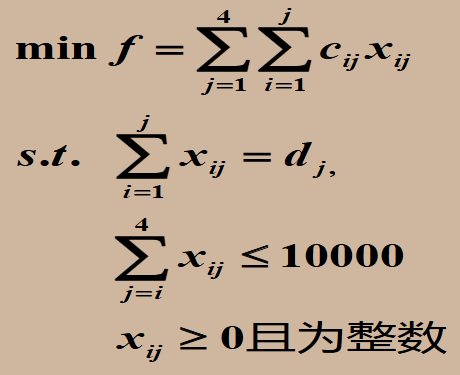

In [ ]:
!pip install pulp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 58.1 MB/s eta 0:00:00


In [ ]:
"""
用 PuLP 求解 生产计划问题
作者： 姓名，时间
"""
# https://coin-or.github.io/pulp/main/index.html

# !pip install pulp


from pulp import *

######### 1、给相关节点命名，以节点名称为键， 相关参数为值创建字典 #########
# Creates a list of all the supply nodes
Productions = ["1", "2", "3", "4"]

# Creates a dictionary for the number of units of supply for each supply node
supply = {"1": 10000,
      "2": 10000,
      "3": 10000,
      "4": 10000}

# Creates a list of all demand nodes
Sales = ["1", "2", "3", "4"]

# Creates a dictionary for the number of units of demand for each demand node
demand = {
    "1": 6000,
    "2": 7000,
    "3": 12000,
    "4": 6000
}

######### 2、将成本数据输入到一个列表中 #########
# Creates a list of costs of each transportation path
costs = [  # 销售量
   # S1 S2 S3 S4
    [70, 72, 74, 76],  # P1   产量
    [10000, 74, 74, 76],  # P2
    [10000, 10000, 80, 82],  # P3
    [10000, 10000, 10000, 76],  # P4   !!! 无法选择的路径用较大的成本填充 ！！！
]

# The cost data is made into a dictionary
costs = makeDict([Productions, Sales], costs, 0)
# costs[“P1”][“S2”]： P1 月生产的产品 到 S2 月销售 的成本


######### 3、LpProblem 函数创建 prob 变量 并求解 #########
# Creates the 'prob' variable to contain the problem data
prob = LpProblem("生产计划问题", LpMinimize)

# 创建包含 所有可能的传输路径 的元组列表
# Creates a list of tuples containing all the possible routes for transport
Routes = [(p, s) for p in Productions for s in Sales]

# 创建 包含 LP 变量， 名为 vars 的字典
# A dictionary called 'Vars' is created to contain the referenced variables(the routes)
vars = LpVariable.dicts("Route", (Productions, Sales), 0, None, LpInteger) # 产品数量为整数

# 添加目标函数
# The objective function is added to 'prob' first
prob += (
    lpSum([vars[p][s] * costs[p][s] for (p, s) in Routes]),
    "成本",
)

# 添加约束
# The supply maximum constraints are added to prob for each supply node (warehouse)
for p in Productions:
    prob += (
        lpSum([vars[p][s] for s in Sales]) <= supply[p],
        f"{p} 的产量",
    )

# The demand minimum constraints are added to prob for each demand node (bar)
for s in Sales:
    prob += (
        lpSum([vars[p][s] for p in Productions]) == demand[s],
        f" {s} 的销售数量",
    )

######### 4、求解并打印相关结果  #########

prob.solve()

# 可能的求解状态：“Not Solved”, “Infeasible”, “Unbounded”, “Undefined” or “Optimal”.
print("求解状态:", LpStatus[prob.status])

# 优化的参数
for v in prob.variables():
    print(v.name, "=", v.varValue)

print("最低成本 = ", value(prob.objective))

求解状态: Optimal
Route_1_1 = 6000.0
Route_1_2 = 4000.0
Route_1_3 = 0.0
Route_1_4 = 0.0
Route_2_1 = 0.0
Route_2_2 = 3000.0
Route_2_3 = 7000.0
Route_2_4 = 0.0
Route_3_1 = 0.0
Route_3_2 = 0.0
Route_3_3 = 5000.0
Route_3_4 = 0.0
Route_4_1 = 0.0
Route_4_2 = 0.0
Route_4_3 = 0.0
Route_4_4 = 6000.0
最低成本 =  2304000.0


<font color=blue>1 月：生产 10000，销售 6000 </font>

<font color=blue>2 月：生产 10000，销售 7000 </font>

<font color=blue>3 月：生产 5000，销售 12000 </font>

<font color=blue>4 月：生产 6000，销售 6000 </font>